classifico il dataset dove ho effettuato undersampling per bilanciare le classi senza però operare sui valori di current loan amount lasciandoli così come sono

#IMPORT DATASET

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/PROGETTO DATA MINING 1/undersampling.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


class_name = 'Loan Status'

df

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,206602.0,Short Term,729.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,Charged Off
1,648714.0,Long Term,721.638848,1.372699e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0,Charged Off
2,653004.0,Long Term,721.638848,1.372699e+06,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0,Charged Off
3,317108.0,Long Term,687.000000,1.133274e+06,8 years,Rent,Debt Consolidation,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0,Charged Off
4,153252.0,Short Term,714.000000,1.890690e+06,2 years,Rent,Debt Consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45249,99999999.0,Long Term,642.000000,1.483824e+06,8 years,Rent,Debt Consolidation,46122.31,14.2,12.0,0.0,514463.0,635734.0,0.0,0.0,Fully Paid
45250,436348.0,Short Term,721.638848,1.372699e+06,10+ years,Home Mortgage,Debt Consolidation,26292.96,13.4,13.0,0.0,198094.0,532180.0,0.0,0.0,Fully Paid
45251,647394.0,Long Term,721.000000,1.427223e+06,2 years,Home Mortgage,Debt Consolidation,27949.95,18.0,7.0,0.0,722988.0,1012264.0,0.0,0.0,Fully Paid
45252,107712.0,Short Term,733.000000,3.139940e+05,6 years,Rent,Debt Consolidation,4997.57,14.5,8.0,0.0,10906.0,280764.0,0.0,0.0,Fully Paid


#GESTIONE DELLE VARIABILI CATEGORIALI

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
#df['Loan Status'] = lb_make.fit_transform(df['Loan Status'])

df['Term'] = lb_make.fit_transform(df['Term'])

df['Years in current job'] = lb_make.fit_transform(df['Years in current job'])

df['Home Ownership'] = lb_make.fit_transform(df['Home Ownership'])

df['Purpose'] = lb_make.fit_transform(df['Purpose'])


df.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,206602.0,1,729.000000,8.968570e+05,1,0,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,Charged Off
1,648714.0,0,721.638848,1.372699e+06,10,0,1,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0,Charged Off
2,653004.0,0,721.638848,1.372699e+06,7,0,3,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0,Charged Off
3,317108.0,0,687.000000,1.133274e+06,8,2,3,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0,Charged Off
4,153252.0,1,714.000000,1.890690e+06,2,2,3,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0,Charged Off


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45254 entries, 0 to 45253
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        45254 non-null  float64
 1   Term                       45254 non-null  int64  
 2   Credit Score               45254 non-null  float64
 3   Annual Income              45254 non-null  float64
 4   Years in current job       45254 non-null  int64  
 5   Home Ownership             45254 non-null  int64  
 6   Purpose                    45254 non-null  int64  
 7   Monthly Debt               45254 non-null  float64
 8   Years of Credit History    45254 non-null  float64
 9   Number of Open Accounts    45254 non-null  float64
 10  Number of Credit Problems  45254 non-null  float64
 11  Current Credit Balance     45254 non-null  float64
 12  Maximum Open Credit        45254 non-null  float64
 13  Bankruptcies               45254 non-null  flo

In [7]:
df['Loan Status'].value_counts()

Charged Off    22627
Fully Paid     22627
Name: Loan Status, dtype: int64

# Evaluating the Performance of a Classifier



In order to evaluate the quality of classification there exist several measures: all of them built upon the concept of **Confusion Matrix**.

**Confusion Matrix**
In the field of machine learning a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="right" width="300" src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Given a Target class:
* ***True Positive (TP)*** represent those instances correctly predicted to be True
* ***False Positive (FP)*** represent those instances incorrectly predicted to be True
* ***True Negative (TN)*** represent those instances correctly predicted to be False
* ***False Negative (FT)*** represent those instances incorrectly predicted to be False 

Upon such classes are built several indicators.
Among the otehrs, two scores characterize the outcome of a predictive model: ***precision*** and ***recall***

* **Precision**: how many of the instances I predict to be True are really True? $\mathit{precision} = \frac{TP}{TP+FP}$
* **Recall**: how many True instances I was able to correctly predict? $\mathit{recall} = \frac{TP}{TP+FN}$

To summarize the overall performance of a model we can also use the ***accuracy*** and the ***f1-score***: 

* The **accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ captures the number of instances correctly classified above all
* $1-\mathit{accuracy}$ gives the errore rate, i.e., the error committed by the classifier.
* The **f1-score** $= \frac{2TP}{2TP+FP+FN}$ describes the armonic mean of precision and recall.

All these indicators are provided by [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# Decision Tree in Python  ([sklearn](http://scikit-learn.org/stable/modules/tree.html))

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the dataset into train and test

In [0]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [10]:
X_train.shape, X_test.shape

((31677, 15), (13577, 15))

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, 
                             min_samples_split=5, min_samples_leaf=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [12]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 0.7679304396737014
Term 0.0
Credit Score 0.2320695603262986
Annual Income 0.0
Years in current job 0.0
Home Ownership 0.0
Purpose 0.0
Monthly Debt 0.0
Years of Credit History 0.0
Number of Open Accounts 0.0
Number of Credit Problems 0.0
Current Credit Balance 0.0
Maximum Open Credit 0.0
Bankruptcies 0.0
Tax Liens 0.0


In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [0]:
#import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'

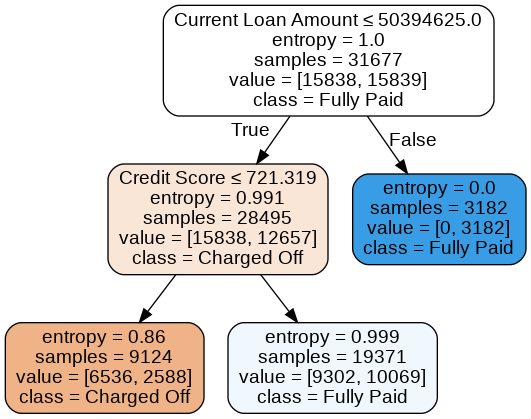

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Apply the decision tree on the training set

In [0]:
y_pred = clf.predict(X_train)

Evaluate the performance

In [17]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.6246487988130189
F1-score [0.52367599 0.69030006]


In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.72      0.41      0.52     15838
  Fully Paid       0.59      0.84      0.69     15839

    accuracy                           0.62     31677
   macro avg       0.65      0.62      0.61     31677
weighted avg       0.65      0.62      0.61     31677



In [19]:
confusion_matrix(y_train, y_pred)

array([[ 6536,  9302],
       [ 2588, 13251]])

Apply the decision tree on the test set and evaluate the performance

In [0]:
y_pred = clf.predict(X_test)

In [21]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.6218604993739413
F1-score [0.51883786 0.68854647]
              precision    recall  f1-score   support

 Charged Off       0.71      0.41      0.52      6789
  Fully Paid       0.59      0.84      0.69      6788

    accuracy                           0.62     13577
   macro avg       0.65      0.62      0.60     13577
weighted avg       0.65      0.62      0.60     13577



array([[2768, 4021],
       [1113, 5675]])

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['Charged Off', 'Fully Paid']

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6218762729546295

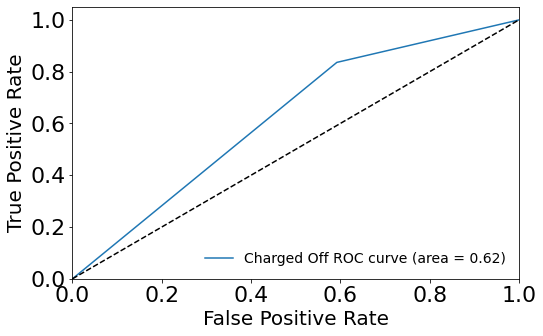

In [25]:
plt.figure(figsize=(8, 5))
for i in range(1):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation  
More options at [link](http://scikit-learn.org/stable/modules/cross_validation.html#)

In [0]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6238 (+/- 0.01)
F1-score: 0.6060 (+/- 0.01)


In [28]:
scores

array([0.6013404 , 0.61097288, 0.60234112, 0.60090622, 0.60702695,
       0.59361015, 0.61158003, 0.61617909, 0.60563311, 0.61024931])

### Tuning the hyper-parameters

More options at [link](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [0]:
report(random_search.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.668 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}

Model with rank: 1
Mean validation score: 0.668 (std: 0.001)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.668 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 100, 'max_depth': 5}

Model with rank: 4
Mean validation score: 0.667 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 100, 'max_depth': 6}

Model with rank: 5
Mean validation score: 0.667 (std: 0.002)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 30, 'max_depth': 6}

Model with rank: 6
Mean validation score: 0.667 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 6}

Model with rank: 7
Mean validation score: 0.667 (std: 0.004)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 7}

Model with rank: 7
Mea

#ALTRI CLASSIFICATORI DI PROVA

# Random Forest

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=20, 
                             criterion='gini', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=5, 
                             class_weight=None)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6732 (+/- 0.01)
F1-score: 0.6675 (+/- 0.01)


In [0]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.predict(X_test)

array(['Fully Paid', 'Fully Paid', 'Charged Off', ..., 'Charged Off',
       'Fully Paid', 'Fully Paid'], dtype=object)

# K-Nearest Neighbors

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
clf = KNeighborsClassifier(n_neighbors=212)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6361 (+/- 0.01)
F1-score: 0.6285 (+/- 0.01)
